## Carregando o dataset

In [ ]:
import pandas as pd

df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv",
    delimiter=";",
    encoding='utf-8'
)

df.describe()

,nome,descricao,categoria
count,4080,2916,4080
unique,3696,2460,4
top,Bonecos Brinquedo Vingadores 30 Cm Com Luz E...,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro
freq,20,39,1020


In [ ]:
df.head()

,nome,descricao,categoria
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro


In [ ]:
df.count()

nome         4080
descricao    2916
categoria    4080
dtype: int64

## Quais valores são nulos e qual a porcentagem?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       4080 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  4080 non-null   object
dtypes: object(3)
memory usage: 95.8+ KB


In [ ]:
# dimensão do dataframe
df.shape

(4080, 3)

In [ ]:
print(df.shape[0], df.shape[1])

4080 3


In [ ]:
# conta valores faltantes/nulos/missing
df.isnull().sum()

nome            0
descricao    1164
categoria       0
dtype: int64

In [ ]:
# calcula o % de nulos no dataset
df.isnull().sum()/df.shape[0]

nome         0.000000
descricao    0.285294
categoria    0.000000
dtype: float64

## Remover as linhas com valores nulos

In [ ]:
df.dropna(inplace=True) # dropna(inplace=True), inplace=True => modifica o próprio objeto. dropna(inplace=False), inplace=False => retorma uma cópia do objeto
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       2916 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  2916 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


## Distribuição das categorias

In [ ]:
df.categoria.value_counts()

livro        838
maquiagem    788
brinquedo    668
game         622
Name: categoria, dtype: int64

In [ ]:
(df.categoria.value_counts()/df.shape[0])*100
# df.categoria.value_counts()/df.categoria.count() # outra forma

livro        28.737997
maquiagem    27.023320
brinquedo    22.908093
game         21.330590
Name: categoria, dtype: float64

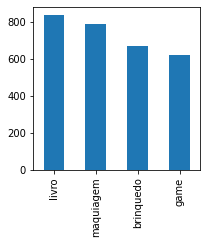

In [ ]:
df.categoria.value_counts().plot(kind='bar', figsize=(3,3))

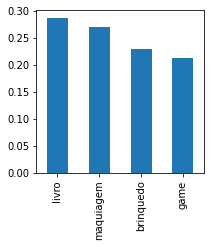

In [ ]:
(df.categoria.value_counts()/df.shape[0]).plot(kind='bar', figsize=(3,3))

## Mostrar as 10 palavras que mais ocorrem na descrição

In [ ]:
from collections import Counter
counter = Counter()
counter['a'] += 2
counter

counter.update('a')
counter.update('b')

Counter({'a': 3, 'b': 1})

In [ ]:
from collections import Counter # implementa um container de tipo de dados. Ex: dict, list, set, and tuple

c = Counter() # subclasse dict para contar objetos

Counter()

In [ ]:
df.descricao.str.lower().str.split() # default do split é o <espaço> como separador
#df.dtypes

0       [produto, novobilbo, bolseiro, é, um, hobbit, ...
1       [produto, novodurante, as, férias, escolares, ...
2       [produto, novotodo, o, reino, de, westeros, ao...
3       [produto, novo, e, físico, a, série, harry, po...
4       [produto, novode, onde, viemos?, para, onde, v...
                              ...                        
4073    [red, dead, redemption, edição, do, ano, goty,...
4074    [game:, gta, v, -, grand, theft, auto, fiveesp...
4075    [envio, imediato, após, confirmaçãocom, este, ...
4078    [nome, do, jogo:, gta, san, andreas, hd, remas...
4079    [para, ligar, o, aparelho, pressionar, os, bot...
Name: descricao, Length: 2916, dtype: object

In [ ]:
df.descricao.str.lower().str.split(" ") # tranforma a descrição em minúsculas e depois separa as pelavras pelo <espaço> e retorna no formato de lista

0       [produto, novobilbo, bolseiro, é, um, hobbit, ...
1       [produto, novodurante, as, férias, escolares, ...
2       [produto, novotodo, o, reino, de, westeros, ao...
3       [produto, novo, e, físico, , a, série, harry, ...
4       [produto, novode, onde, viemos?, para, onde, v...
                              ...                        
4073    [red, dead, redemption, edição, do, ano, goty,...
4074    [game:, gta, v, -, grand, theft, auto, fiveesp...
4075    [envio, imediato, após, confirmaçãocom, este, ...
4078    [nome, do, jogo:, gta, san, andreas, hd, remas...
4079    [para, ligar, o, aparelho, pressionar, os, bot...
Name: descricao, Length: 2916, dtype: object

In [ ]:
df.descricao.str.lower().str.split(" ").apply(c.update) # implementa a contagem
c.most_common(10)

[('de', 23835),
 ('e', 15774),
 ('o', 12238),
 ('a', 11905),
 ('do', 8657),
 ('para', 7913),
 ('em', 6798),
 ('que', 6770),
 ('-', 6220),
 ('com', 6099)]

## E as palasvras das categorias na descrição, quantas tem?

In [ ]:
c.get('livro')

# fazer para as demais categorias

545

## Nuvem de palavras!

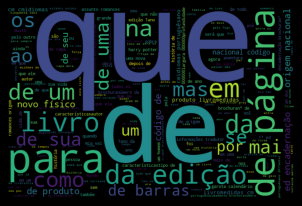

In [ ]:
import nltk
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud

livro_words = ''
livro = df[df.categoria == 'livro'] # filtrei a categoria livro apenas como exemplo rápido para a demostração

# reune todas as plalavras em um único objeto, veja.
for val in livro.descricao:
  text = val.lower()
  for words in text:
    livro_words = livro_words + words
    # todas as palavras das descrições da categoria livro no mesmo objeto: livro_words. As palavras são inseridas letra por letra

# Gera uma imagem da nuvem de palavras (Generate a word cloud image)
livro_wordcloud = WordCloud(width=600, height=400).generate(livro_words)

# Word cloud da categoria Livro
plt.figure( figsize=(4,4), facecolor='k')
plt.imshow(livro_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0) # Preenchimento entre a borda e a figura
plt.show()